In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [2]:
def get_laplacian(A, laplacian='unnormalized'):
	#laplacian for undirected graph
	laplacian_type = ['unnormalized', 'randomwalk']
	if laplacian not in laplacian_type:
		raise ValueError("Invalid laplacian type. Expected one of: %s" % laplacian)
	
	
	in_deg = np.sum(A, axis = 0)
	out_deg = np.sum(A, axis=1)

	D = np.diag(np.asarray(out_deg).reshape(-1)) #out_degree matrix 

	if laplacian == 'unnormalized':
		L = D - A
	else: #randomwalk laplacian
		n = A.shape[0] #number of nodes
		L = np.identity(n) - A @ np.linalg.inv(D)

	return (L)

In [3]:
A = np.matrix([[0, 1, 0, 0],[1, 0, 1 ,1], [0, 1, 0, 1], [0, 1, 1, 0]]) #adjacency matrix 
k_max = 20 #max transition steps 
transition_steps = range(k_max+1)

In [4]:
#Diffusion Laplacian:
L_diff = get_laplacian(A, laplacian='unnormalized')

In [5]:
expm(-L_diff*80)

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [8]:
#eigenvalues 
print(np.round(np.linalg.eig(L_diff)[0])) #note: eigenvalues can be negative here 


[ 4.  1. -0.  3.]


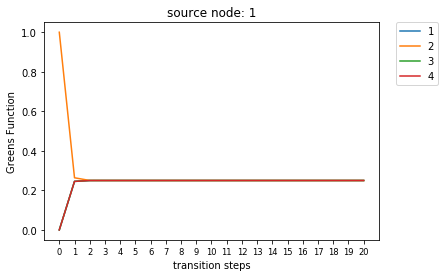

In [10]:
#Continuous diffusion 
G = expm(-L_diff*1)

n = A.shape[0] #number of nodes
X_0 = np.identity(n) #initial state-space/drivers
X = np.zeros(((k_max+1), n, n)) #3D array of all state-spaces 
X[0, :, :] = X_0
X_i = X_0 
for i in range(k_max):
	X_f = G @ X_i
	X_i = X_f 
	X[(i+1), :, :] = X_f
	

#node 'm' is source
m = 1


for i in range(n):
	X_n = X[:, i, m]
	plt.plot(transition_steps, X_n, label = str(i+1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('source node: ' + str(m) )
plt.ylabel('Greens Function')
plt.xlabel('transition steps')
plt.xticks(range(len(transition_steps)), transition_steps, size='small')
plt.show()

In [12]:
#Continuous random walk 
delta_t = 0.01
k_max = 5
time_steps = np.arange(0, (k_max+delta_t), delta_t)


#Continuous random walk 
G = expm(-L_diff*delta_t)

X_0 = np.identity(n) #initial state-space/drivers
X = np.zeros((len(time_steps), n, n)) #3D array of all state-spaces 
X[0, :, :] = X_0
X_i = X_0 
for i in range(1, len(time_steps)):
    X_f = G @ X_i
    X_i = X_f
    #print(i)
    X[(i), :, :] = X_f

    #node 'm' is source
m = 1

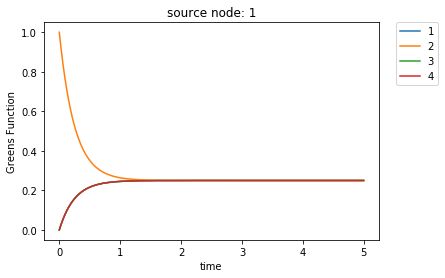

In [13]:
for i in range(n):
	X_n = X[:, i, m]
	plt.plot(time_steps, X_n, label = str(i+1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('source node: ' + str(m) )
plt.ylabel('Greens Function')
plt.xlabel('time')
#plt.xticks(range(len(transition_steps)), transition_steps, size='small')
plt.show()

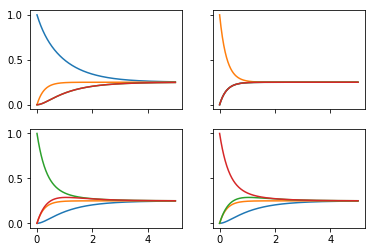

In [14]:

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
m = 0 
for row in ax:
    for col in row:
        for j in range(n):
            X_n = X[:, j, m]
            col.plot(time_steps, X_n, label = str(j+1))
        m+=1 


plt.show()